Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/My\ Drive/SkinCancerImages

Mounted at /content/drive
Test  Train


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/SkinCancerImages/Train/")
data_dir_test = pathlib.Path("/content/drive/My Drive/SkinCancerImages/Test/")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2241
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
validation_split=0.2
seed_train_validation=123

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =tf.keras.utils.image_dataset_from_directory(
    directory=data_dir_train,
    image_size = (img_height, img_width),
    validation_split = validation_split,
    batch_size=batch_size,
    subset = "training",
    seed = seed_train_validation,
    color_mode = 'rgb',
    shuffle = True)

Found 2241 files belonging to 9 classes.
Using 1793 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =tf.keras.utils.image_dataset_from_directory(
    directory=data_dir_train,
    image_size = (img_height, img_width),
    validation_split = validation_split,
    batch_size=batch_size,
    subset = "validation",
    seed = seed_train_validation,
    color_mode = 'rgb',
    shuffle = True)


Found 2241 files belonging to 9 classes.
Using 448 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

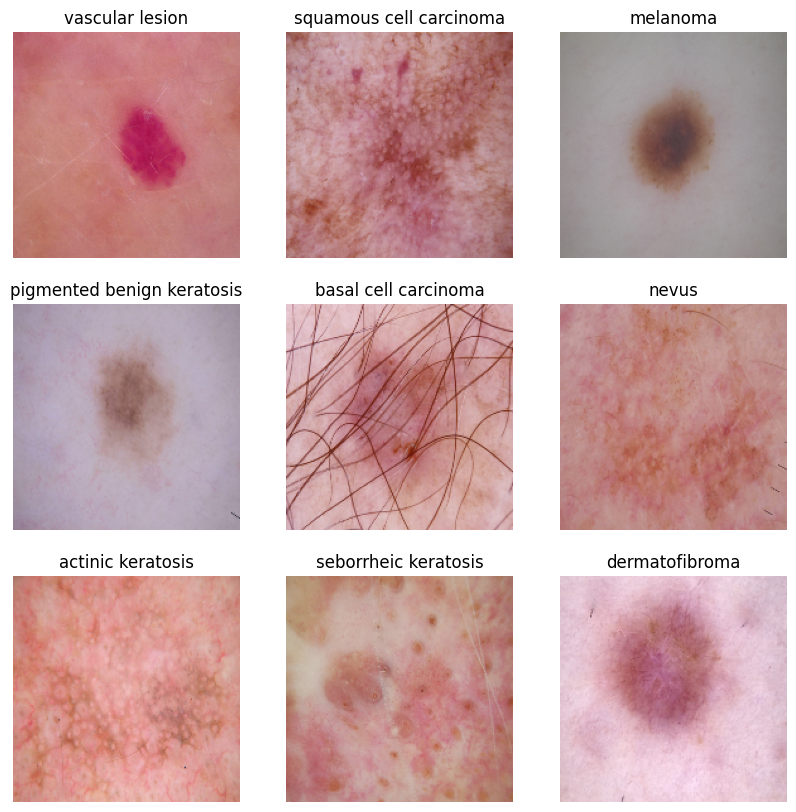

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt_images=[]
plt.figure(figsize=(10, 10))
j=0
for images, labels in train_ds.take(5):
  #for i in range(9):
   i=0

   while True:
      if j == 9:
        break
      ax = plt.subplot(3, 3, j + 1)
      cancer_name=str(class_names[labels[i]])
      #print(cancer_name)
      #print(type(cancer_name))
      if not (cancer_name in plt_images):
          plt_images.append(cancer_name)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_names[labels[i]])
          plt.axis("off")
          j=j+1
      if len(plt_images)==len(class_names):
           break
      if i== batch_size -1:
         break
      i=i+1


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here


num_classes = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.2128 - loss: 2.2195 - val_accuracy: 0.1897 - val_loss: 2.0259
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.2810 - loss: 1.9413 - val_accuracy: 0.3929 - val_loss: 1.7305
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.4601 - loss: 1.5976 - val_accuracy: 0.5000 - val_loss: 1.4579
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5301 - loss: 1.3721 - val_accuracy: 0.5558 - val_loss: 1.3572
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5482 - loss: 1.2408 - val_accuracy: 0.5312 - val_loss: 1.3909
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5756 - loss: 1.2174 - val_accuracy: 0.5558 - val_loss: 1.3241
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.6335 - loss: 1.0579 - val_accuracy: 0.5223 - val_loss: 1.4756
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6521 - loss: 0.9662 - val_accuracy: 0.5424 - val_loss

### Visualizing training results

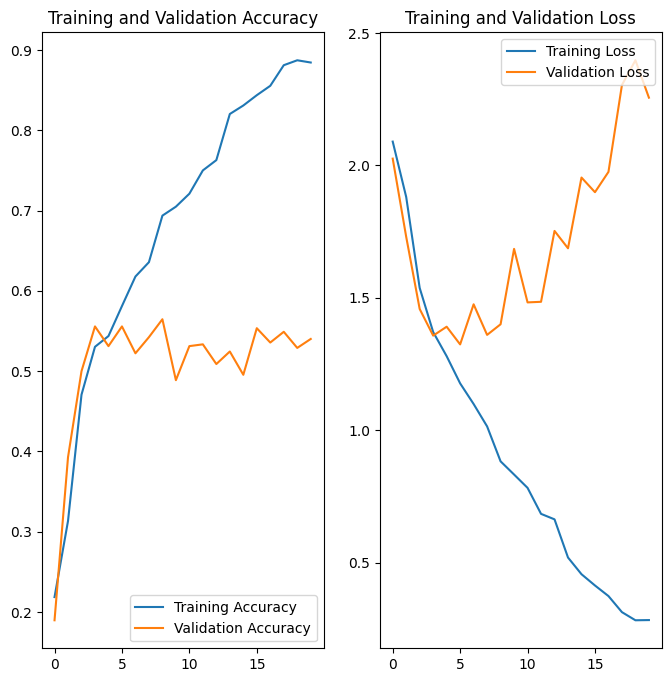

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
#Observations:
#The model is clearly overfitting as the training accuracy is very high but the validation accuracy is very low

#We will choose an appropriate augmentation strategy
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


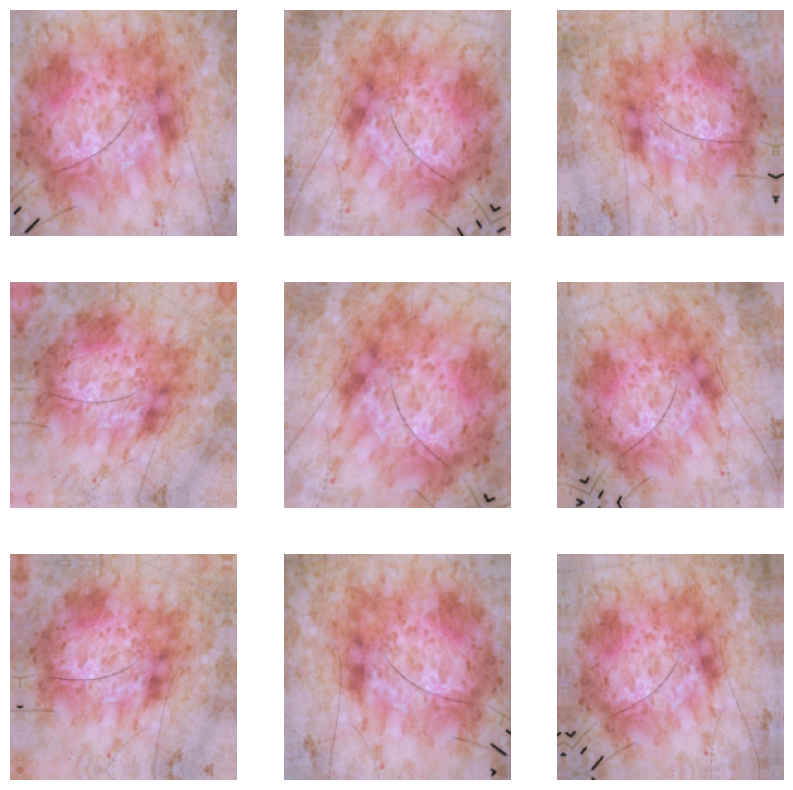

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.1995 - loss: 2.2437 - val_accuracy: 0.2723 - val_loss: 2.0429
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2904 - loss: 1.9435 - val_accuracy: 0.4152 - val_loss: 1.7632
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3817 - loss: 1.7498 - val_accuracy: 0.3996 - val_loss: 1.6172
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4760 - loss: 1.5366 - val_accuracy: 0.4955 - val_loss: 1.5178
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5051 - loss: 1.4718 - val_accuracy: 0.5156 - val_loss: 1.4007
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5129 - loss: 1.3699 - val_accuracy: 0.5402 - val_loss: 1.3547
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5428 - loss: 1.3015 - val_accuracy: 0.5357 - val_loss: 1.3828
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5027 - loss: 1.3903 - val_accuracy: 0.5134 - val_loss:

### Visualizing the results

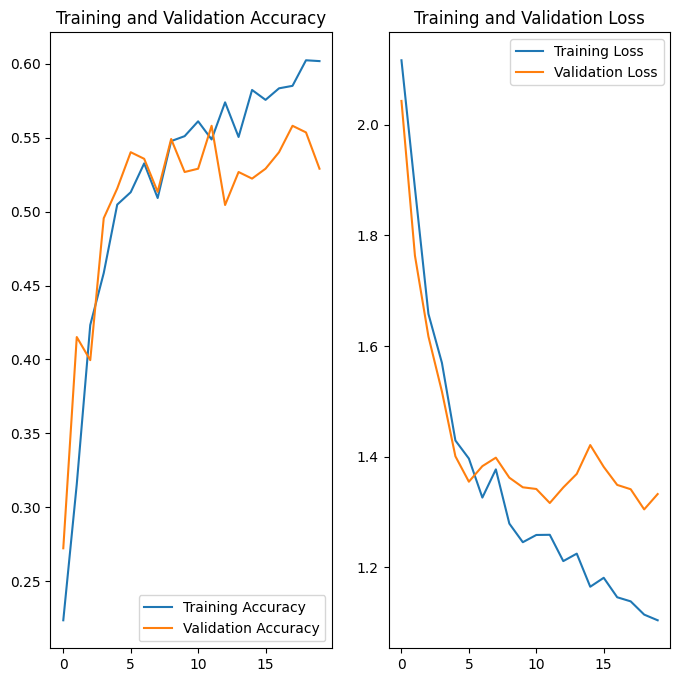

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There is some improvement in overfitting. The training accuracy and validation accuracy increased linearly overtime and also the gap between training accuracy and validationa accuracy is reduced when compared to the previous run

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= "/content/drive/My Drive/SkinCancerImages/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x798AC51874F0>: 100%|██████████| 500/500 [00:24<00:00, 20.67 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x798AC51E7730>: 100%|██████████| 500/500 [00:22<00:00, 22.62 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x798AC5302110>: 100%|██████████| 500/500 [00:26<00:00, 18.71 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x798AC505FA60>: 100%|██████████| 500/500 [01:52<00:00,  4.43 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1028x753 at 0x798AC54CA470>: 100%|██████████| 500/500 [01:40<00:00,  4.99 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x798AC5256C80>: 100%|██████████| 500/500 [00:25<00:00, 19.74 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x798AC54CB370>: 100%|██████████| 500/500 [00:48<00:00, 10.24 Samples/s]


Initialised with 183 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x798ABD77BCA0>: 100%|██████████| 500/500 [00:25<00:00, 19.42 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/SkinCancerImages/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x798AC54CB250>: 100%|██████████| 500/500 [00:29<00:00, 16.91 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
from glob import glob

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/My Drive/SkinCancerImages/Train/melanoma/output/melanoma_original_ISIC_0011040.jpg_adfa1f9a-26c3-4672-8b6e-9f2c00a5c75a.jpg',
 '/content/drive/My Drive/SkinCancerImages/Train/melanoma/output/melanoma_original_ISIC_0010741.jpg_81f849c6-f3b5-4c67-8a28-f345dc242b97.jpg',
 '/content/drive/My Drive/SkinCancerImages/Train/melanoma/output/melanoma_original_ISIC_0010630.jpg_0aa06559-f127-4188-b3e0-b59a7dc51ff7.jpg',
 '/content/drive/My Drive/SkinCancerImages/Train/melanoma/output/melanoma_original_ISIC_0010559.jpg_330f39b0-e654-477b-83a5-1fe75834791c.jpg',
 '/content/drive/My Drive/SkinCancerImages/Train/melanoma/output/melanoma_original_ISIC_0010749.jpg_f6d5ca09-984c-4b0e-bdc1-e3558ad0b628.jpg',
 '/content/drive/My Drive/SkinCancerImages/Train/melanoma/output/melanoma_original_ISIC_0000292.jpg_648d54f9-3199-47f8-9f59-563d2b1bd004.jpg',
 '/content/drive/My Drive/SkinCancerImages/Train/melanoma/output/melanoma_original_ISIC_0011140.jpg_6e7b9f39-a01b-4b94-92b4-3af554eb5b8c.jpg',

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [ ]:
df2['Label'].value_counts()

,count
Label,
melanoma,500
squamous cell carcinoma,500
actinic keratosis,500
nevus,500
dermatofibroma,500
seborrheic keratosis,500
vascular lesion,500
pigmented benign keratosis,500
basal cell carcinoma,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
#data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train = pathlib.Path("/content/drive/My Drive/SkinCancerImages/Train/")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6741 files belonging to 9 classes.
Using 5393 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6741 files belonging to 9 classes.
Using 1348 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [53]:

epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.2609 - loss: 1.9458 - val_accuracy: 0.4421 - val_loss: 1.4987
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.4894 - loss: 1.4078 - val_accuracy: 0.5074 - val_loss: 1.3352
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.5382 - loss: 1.2442 - val_accuracy: 0.6024 - val_loss: 1.1143
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.6374 - loss: 1.0002 - val_accuracy: 0.6602 - val_loss: 0.9761
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.7153 - loss: 0.8051 - val_accuracy: 0.6669 - val_loss: 0.9624
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7616 - loss: 0.6560 - val_accuracy: 0.6780 - val_loss: 0.9725
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.8210 - loss: 0.5106 - val_accuracy: 0.6892 - val_loss: 0.9682
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.8317 - loss: 0.4520 - val_accu

#### **Todo:**  Visualize the model results

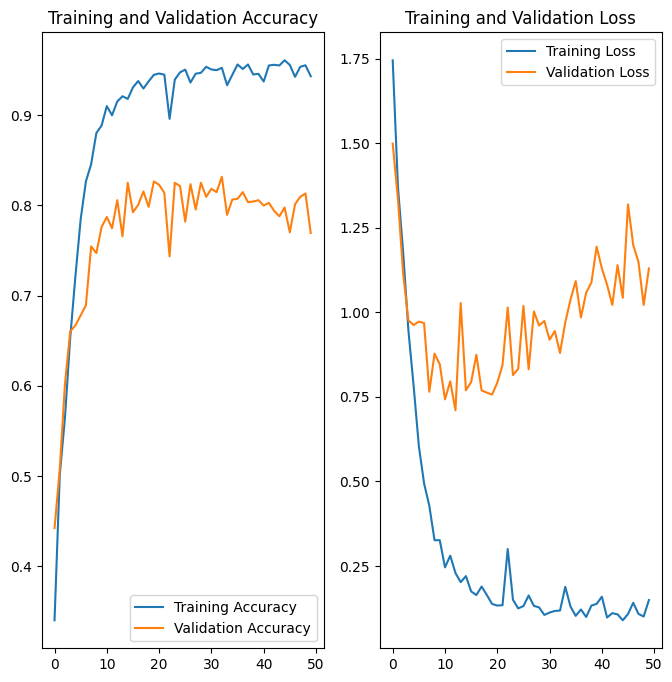

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Analysis:
Training accuracy and validation accuracy improved significantly when compared to previous run.
Though there is some overfitting as we can see the gap between training accuracy and validation accuracy